In [1]:
import pandas as pd
import numpy as np

pred_df = pd.read_csv("C:/Users/Christian/Documents/Cand_merc/Data-Science-Project/data_science_project/Beat the bookies/data/df_preprocessed.csv", index_col=0)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load and prepare the data
pred_df['Home'] = pred_df['Home'].astype('category')
pred_df['Away'] = pred_df['Away'].astype('category')
pred_df['FTR'] = pred_df['FTR'].astype('category')

# Ensure 'date' is in datetime format
# pred['date'] = pd.to_datetime(pred['Date'])

# Split data into train and test sets
train = pred_df[pred_df['Date'] < '2024-01-01']
test = pred_df[pred_df['Date'] >= '2024-01-01']

# Define predictors and target
X_train = train[['Home', 'Away', 'Attendance', 'B365H', 'B365D', 'B365A',
       'AttackStrengthHome', 'AttackStrengthAway', 'DefenseWeaknessHome',
       'DefenseWeaknessAway', 'AvgHomePoints', 'AvgAwayPoints',
       'AvgLosingHomePoints', 'AvgLosingAwayPoints', 'AvgGoalDiffHome',
       'AvgGoalDiffAway', 'HomeWinsRatio', 'HomeDrawsRatio', 'AwayWinsRatio',
       'AwayDrawsRatio', 'AvgHomeCornersLast5', 'AvgAwayCornersLast5',
       'AvgHomeShotsLast5', 'AvgHomeShotsOnTargetLast5', 'AvgAwayShotsLast5',
       'AvgAwayShotsOnTargetLast5', 'elo', 'elo_away', 'FormHomeTeam',
       'FormAwayTeam', 'ProbabilityDraw', 'ProbabilityHomeWin',
       'ProbabilityAwayWin']]

y_train = train['FTR']
X_test = test[X_train.columns]
y_test = test['FTR']

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to keep column labels
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [3]:
# Train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Confusion Matrix - Training Set")
print(confusion_matrix(y_train, y_train_pred))

print("Confusion Matrix - Test Set")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.5447
Test Accuracy: 0.5250
Confusion Matrix - Training Set
[[242  46 183]
 [122  68 281]
 [ 88  54 616]]
Confusion Matrix - Test Set
[[24  2 23]
 [ 9  0 29]
 [ 9  4 60]]


c:\Users\Christian\AppData\Local\pypoetry\Cache\virtualenvs\data-science-project-VmJyb5kE-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


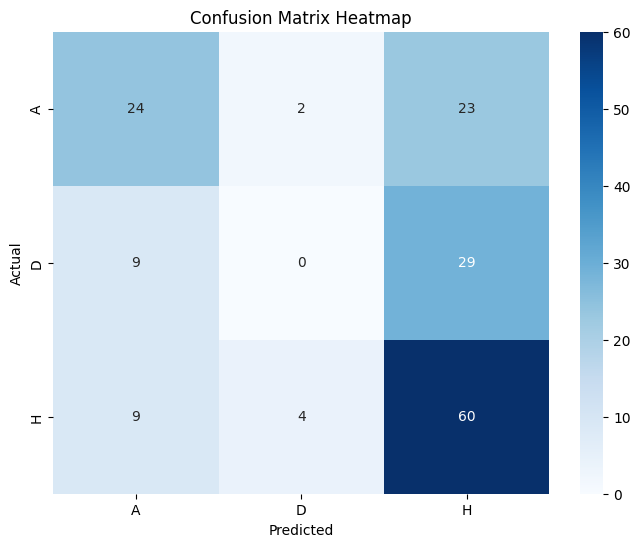

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

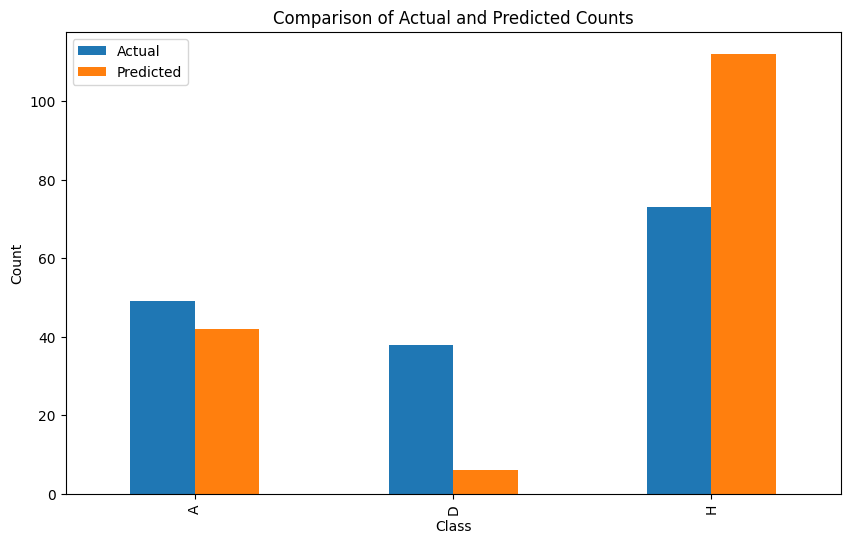

In [5]:
# Count the number of occurrences for each class in actual and predicted values
actual_counts = y_test.value_counts().sort_index()
predicted_counts = pd.Series(y_test_pred).value_counts().sort_index()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts}).fillna(0)

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Counts')
plt.show()